In [3]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt


Import important and deep learning libraries

In [4]:
!nvidia-smi

Wed Mar 20 23:06:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.26                 Driver Version: 546.26       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX350         WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   42C    P0              N/A /  20W |      0MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
#from keras.preprocessing.image import Load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


Initialize data genrators with rescalingg

---



In [6]:
train_data_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_data_gen = ImageDataGenerator(rescale = 1.0/255.0)

Preprocessing all test and train images


In [8]:
train_generator = train_data_gen.flow_from_directory(
  'dataset/train',
  target_size= (48,48),
  batch_size = 64,
  color_mode = "grayscale",
  class_mode = 'categorical'
)

##flow_from_directory helps to flow thru directories and preprocess the data

test_generator = test_data_gen.flow_from_directory(
  'dataset/test',
  target_size= (48,48),
  batch_size = 64,
  color_mode = "grayscale",
  class_mode = 'categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
model = Sequential()


model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (48,48,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation ='softmax'))  #since we have seven classes


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

Now we compile the model

In [11]:
from keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics =['accuracy'])

TRINING THE MODEL

Save model in json file

In [12]:
##Found 28709 images belonging to 7 classes.   train
##Found 7178 images belonging to 7 classes.    test

history = model.fit_generator(train_generator,
                              steps_per_epoch =28709//64  ,
                              epochs = 50,
                              validation_data = test_generator,
                              validation_steps =7178//64)
#since 64 is batch size so for no. of steps divide num of images by 64 for both train and test data

C:\Users\HP\AppData\Local\Temp\ipykernel_1356\2437799723.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/50


448/448 [==============================] - 83s 180ms/step - loss: 1.8340 - accuracy: 0.2416 - val_loss: 1.8125 - val_accuracy: 0.2508
Epoch 2/50
448/448 [==============================] - 88s 196ms/step - loss: 1.7441 - accuracy: 0.2975 - val_loss: 1.6352 - val_accuracy: 0.3686
Epoch 3/50
448/448 [==============================] - 74s 166ms/step - loss: 1.6372 - accuracy: 0.3615 - val_loss: 1.5541 - val_accuracy: 0.4099
Epoch 4/50
448/448 [==============================] - 74s 164ms/step - loss: 1.5720 - accuracy: 0.3916 - val_loss: 1.5207 - val_accuracy: 0.4275
Epoch 5/50
448/448 [==============================] - 2107s 5s/step - loss: 1.5214 - accuracy: 0.4175 - val_loss: 1.4364 - val_accuracy: 0.4561
Epoch 6/50
448/448 [==============================] - 107s 239ms/step - loss: 1.4775 - accuracy: 0.4347 - val_loss: 1.4090 - val_accuracy: 0.4767
Epoch 7/50
448/448 [==============================] - 107s 239ms/step - loss: 1.4343 - accuracy: 0.4530 - val_loss: 1.3576 - val

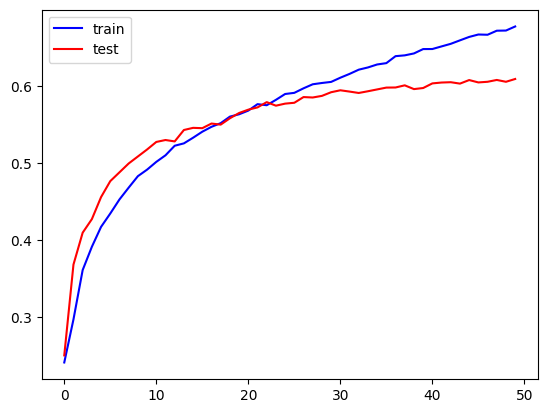

In [13]:
plt.plot(history.history['accuracy'], color = 'blue', label = 'train' )
plt.plot(history.history['val_accuracy'], color = 'red', label = 'test' )

plt.legend()
plt.show()


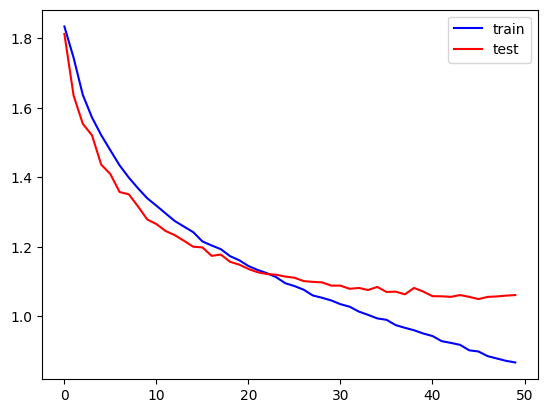

In [14]:
plt.plot(history.history['loss'], color = 'blue', label = 'train' )
plt.plot(history.history['val_loss'], color = 'red', label = 'test' )

plt.legend()
plt.show()


In [15]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

Save trained model in .h5 file

In [16]:
model.save_weights('model.h5')